# Avaliação 2 – Professor Thomas

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

### Importando o dataset

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explorando os dados

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,4026.270117
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,22153.876204
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,19.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,56.929200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,262375.000000


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# Sexo
sex_count = df.groupby('Sex')['Sex'].count()
print(sex_count)

Sex
female    314
male      577
Name: Sex, dtype: int64


In [9]:
# Porto de Embarque
embarked_count = df.groupby('Embarked')['Embarked'].count()
print(embarked_count)

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64


### Feature Engineering

In [10]:
## Dummy variables

## Sex: 0 for male | 1 for female
df['Sex'] = df['Sex'].map(lambda s :1  if s == 'female' else 0)
pd.unique(df['Sex'])

array([0, 1])

In [11]:
## Embarked
dummy_embarked_df = pd.get_dummies(df['Embarked'])
dummy_embarked_df.columns

Index(['C', 'Q', 'S'], dtype='object')

In [12]:
# Dummy trap
dummy_embarked_df.drop(columns='S', inplace = True)
dummy_embarked_df

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
886,0,0
887,0,0
888,0,0
889,1,0


In [13]:
featured_df = pd.concat([df,dummy_embarked_df], axis=1)
featured_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [14]:
## Limpando colunas que não influenciam o modelo
featured_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)
featured_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7925.0000,0,0
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,0


## Dados faltantes 'Age' - Regressão

In [15]:
# verificar valores nulos
featured_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
C             0
Q             0
dtype: int64

In [16]:
featured_df = featured_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'Age']]
featured_df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
0,0,3,0,1,0,7.2500,0,0,22.0
1,1,1,1,1,0,71.2833,1,0,38.0
2,1,3,1,0,0,7925.0000,0,0,26.0
3,1,1,1,1,0,53.1000,0,0,35.0
4,0,3,0,0,0,8.0500,0,0,35.0


In [17]:
featured_df_no_age = featured_df[featured_df['Age'].isna()]
featured_df_no_age.shape

(177, 9)

In [18]:
featured_df_with_age = featured_df.dropna(subset=['Age'])
featured_df_with_age.shape

(714, 9)

In [19]:
X_age = featured_df_with_age.drop('Age', axis=1)
y_age = featured_df_with_age['Age']

In [20]:
X_age.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,714.0,0.406162,0.491460,0.0,0.0,0.0000,1.0,1.0
Pclass,714.0,2.236695,0.838250,1.0,1.0,2.0000,3.0,3.0
Sex,714.0,0.365546,0.481921,0.0,0.0,0.0000,1.0,1.0
SibSp,714.0,0.512605,0.929783,0.0,0.0,0.0000,1.0,5.0
Parch,714.0,0.431373,0.853289,0.0,0.0,0.0000,1.0,6.0
Fare,714.0,4571.049976,23188.910683,0.0,9.5,25.9292,73.5,262375.0
C,714.0,0.182073,0.386175,0.0,0.0,0.0000,0.0,1.0
Q,714.0,0.039216,0.194244,0.0,0.0,0.0000,0.0,1.0


In [21]:
X_age.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
dtype: int64

## Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)

## Primeiro treinamento com modelo de base

In [23]:
from sklearn.model_selection import train_test_split

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.27, random_state=42)

In [24]:
# Treinamento
random_forest.fit(X_train_age, y_train_age)

RandomForestRegressor(random_state=42)

In [25]:
# Predição
y_pred_age = random_forest.predict(X_test_age)

In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_age, y_pred_age)
print('MAE: ', mae)

MAE:  8.995849730986444


## Grid Search para encontrar os parâmetros do melhor modelo

In [27]:
from sklearn.model_selection import GridSearchCV

random_forest_tuning = RandomForestRegressor(random_state=42)

In [28]:
param_grid = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['mae'],
    'bootstrap': [True, False]
}

In [29]:
grid_search = GridSearchCV(estimator=random_forest_tuning, 
                           param_grid=param_grid, 
                           cv=3,
                          verbose=1,
                          n_jobs=-1)

In [30]:
grid_search.fit(X_train_age, y_train_age)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mae'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 500, 800, 1000]},
             verbose=1)

In [31]:
# Visualizando os melhores parametros
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 100}

In [32]:
# Escolhendo o melhor modelo encontrado
# best_estimator_ é o modelo treinado com as melhores configurações, encontrado no GridSearch
best_random_forest = grid_search.best_estimator_

In [33]:
# Predição
y_pred_best_age = best_random_forest.predict(X_test_age)

In [34]:
mae = mean_absolute_error(y_test_age, y_pred_best_age)
print('MAE: ', mae)

MAE:  8.794497409326425


In [36]:
best_random_forest.score(X_age, y_age)

0.6090907628186308

## Predição da idade dos dados faltantes

In [37]:
X_no_age = featured_df_no_age.drop('Age', axis=1)
y_no_age = featured_df_no_age['Age']

In [41]:
y_pred_no_age = best_random_forest.predict(X_no_age)

In [45]:
type(y_pred_no_age)

numpy.ndarray

In [48]:
df_pred_age = X_no_age
df_pred_age['Age'] = y_pred_no_age.tolist()
df_pred_age.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
5,0,3,0,0,0,8.4583,0,1,42.7025
17,1,2,0,0,0,13.0000,0,0,34.0933
19,1,3,1,0,0,7225.0000,1,0,18.2500
26,0,3,0,0,0,7225.0000,1,0,34.5925
28,1,3,1,0,0,7.8792,0,1,19.6400


In [51]:
# Concatenando os dataframes
df_for_class = pd.concat([featured_df_with_age, df_pred_age], ignore_index=True)

df_for_class

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,Age
0,0,3,0,1,0,7.2500,0,0,22.0000
1,1,1,1,1,0,71.2833,1,0,38.0000
2,1,3,1,0,0,7925.0000,0,0,26.0000
3,1,1,1,1,0,53.1000,0,0,35.0000
4,0,3,0,0,0,8.0500,0,0,35.0000
...,...,...,...,...,...,...,...,...,...
886,0,3,0,0,0,7.2292,1,0,27.0575
887,0,3,1,8,2,69.5500,0,0,7.9600
888,0,3,0,0,0,9.5000,0,0,25.8500
889,0,3,0,0,0,7.8958,0,0,26.4525


## Classification for Survived

In [55]:
X = df_for_class.drop('Survived', axis=1)
y = df_for_class['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

In [59]:
#Treinando o modelo
model_LR.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred_LR = model_LR.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

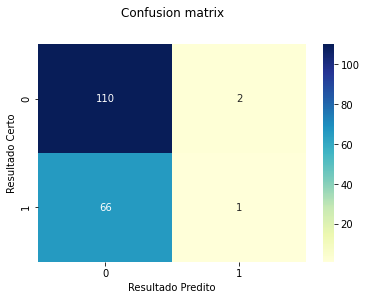

In [61]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [62]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       112
           1       0.33      0.01      0.03        67

    accuracy                           0.62       179
   macro avg       0.48      0.50      0.40       179
weighted avg       0.52      0.62      0.49       179



### KNN - K Nearest Neighborhood

In [63]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [64]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.3f} % and k = {1}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.017 % and k = [1]


In [65]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.3f} % and k = {1}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.860 % and k = [6]


/home/rede/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rede/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


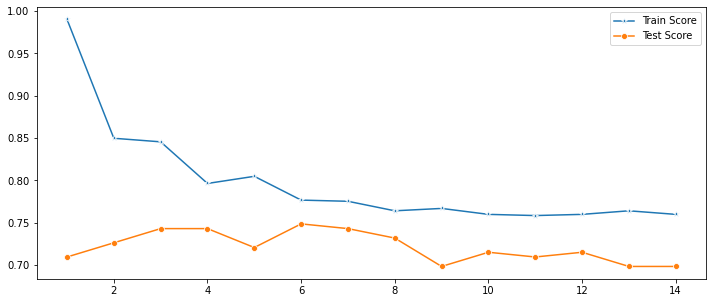

In [66]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [67]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7486033519553073

Text(0.5, 15.0, 'Resultado Predito')

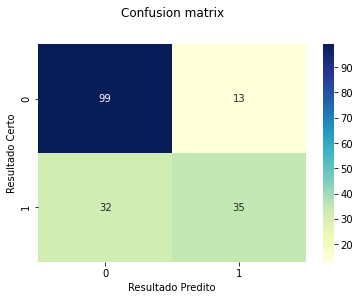

In [68]:
#Confusion Matrix

y_pred_knn = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [69]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       112
           1       0.73      0.52      0.61        67

    accuracy                           0.75       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.75      0.75      0.74       179



### SVM - Support Vector Machines

In [70]:
from sklearn.svm import SVC

model_svc = SVC(kernel='poly')

In [71]:
model_svc.fit(X_train, y_train)

SVC(kernel='poly')

In [72]:
y_pred_svc = model_svc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

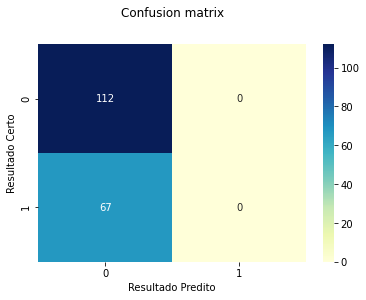

In [73]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [74]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       112
           1       0.00      0.00      0.00        67

    accuracy                           0.63       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.39      0.63      0.48       179



/home/rede/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kernel SVM

In [76]:
from sklearn.svm import SVC

# usando kernel polinomial
model_svc_kernel = SVC(kernel='rbf', gamma = 0.1)

In [77]:
model_svc_kernel.fit(X_train, y_train)

SVC(gamma=0.1)

In [78]:
y_pred_svc_kernel = model_svc_kernel.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

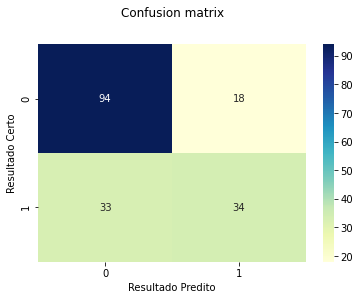

In [79]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [80]:
print(classification_report(y_test, y_pred_svc_kernel))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       112
           1       0.65      0.51      0.57        67

    accuracy                           0.72       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.71      0.72      0.71       179



### Naive Bays

In [81]:
from sklearn.naive_bayes import GaussianNB
model_naive_bays = GaussianNB()

In [82]:
model_naive_bays.fit(X_train, y_train)

GaussianNB()

In [83]:
y_pred_naive_bays = model_naive_bays.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

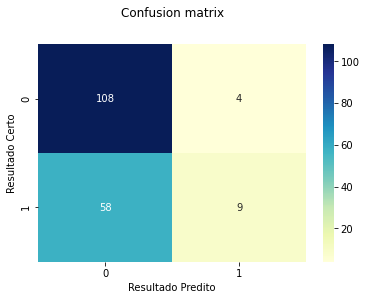

In [84]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [85]:
print(classification_report(y_test, y_pred_naive_bays))

              precision    recall  f1-score   support

           0       0.65      0.96      0.78       112
           1       0.69      0.13      0.23        67

    accuracy                           0.65       179
   macro avg       0.67      0.55      0.50       179
weighted avg       0.67      0.65      0.57       179



### Decision Tree (Classification)

In [86]:
from sklearn import tree
model_dtc = tree.DecisionTreeClassifier()

In [87]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred_dtc = model_dtc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

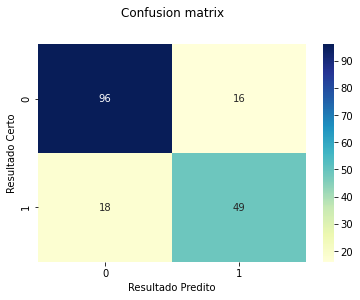

In [89]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [90]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       112
           1       0.75      0.73      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



### Random Forest (Classification)

In [91]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [92]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_pred_rfc = model_rfc.predict(X_test)

Text(0.5, 15.0, 'Resultado Predito')

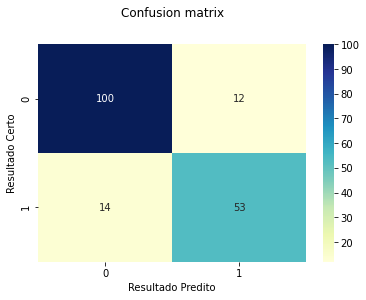

In [94]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [95]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       112
           1       0.82      0.79      0.80        67

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Text(0, 0.5, 'Testing Accuracy')

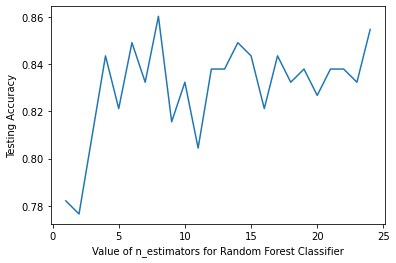

In [96]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 25):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred_rf_new = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_rf_new))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 25), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')